### Theoretical fundamentals


Let consider the modification to original Kantorovich problem:

$$L_C^\epsilon(a, b) = \min_{\mathbf{P}\in \mathbf{U(a, b)}} \langle \mathbf{P}, \mathbf{C} \rangle - \epsilon\mathbf{H(P)}$$

Here we subtracted entropy of a coupling matrix:

$$\mathbf{H(P)} = -\sum P_{ij}(logP_{ij} - 1)$$ 

Which is strongly concave (**TODO**: find proof), thus as we deduct it from $\langle \mathbf{P}, \mathbf{C} \rangle$ then optimization problem becomes a convex optimization problem.

**Why?**: I belive that $\langle \mathbf{P}, \mathbf{C} \rangle$ is not strictly convex as it a linear function thus spans a hyperplane, and adding a 1-strongly convex entropy necessarily results in strictly convex one.  

As the resulting function is strictly convex it's guarantees existence of one optimal solution, that can be found in the following way using Lagrange multiplier method.

$$\mathcal{L(\mathbf{P}, \mathbf{\lambda}, \mathbf{\gamma})} = \langle \mathbf{P}, \mathbf{C} \rangle - \langle \mathbf{P}\mathbb{1}_m - a, \mathbb{\lambda} \rangle - \langle \mathbf{P}^\top\mathbb{1}_n - b, \mathbb{\gamma} \rangle $$

Searching for stationary points yield the solution if following form:

$$P_{ij}=\exp(\mathbf{\lambda}_i/\epsilon)\exp(- C_{ij}/\epsilon)\exp(\mathbf{\gamma}_j/ \epsilon)$$

If we take all values of first exponent to vector $\mathbf{u}$, last to $\mathbf{v}$, and middle to matrix $\mathbf{K}$, then

$$\mathbf{P}^{*} = diag\{\mathbf{u}\}\mathbf{K}diag\{\mathbf{v}\}$$

Note that this solution must satisfy $P^*\mathbb{1}_m=\mathbf{a}$ and $(\mathbf{P}^*)^\top 1_n=\mathbf{b}$. Those constraints can be rewritten as $\mathbf{u}\odot (\mathbf{Kv}) = \mathbf{a}$ and $\mathbf{v}\odot (\mathbf{K^\top u}) = \mathbf{a}$ (as matrix-vector multiplication is linear combination of matrix column and then the sum is multiplied by $\mathbf{u}_j$ to get the required constraint). Thus, iterative algorithm can be applied. Take $\mathbf{v}^{(0)} = \mathbf{1}$ and update rules

$$\mathbf{u}^{(l+1)} = \frac{\mathbf{a}}{\mathbf{Kv}^{(l)}}$$

$$\mathbf{v}^{(l+1)} = \frac{\mathbf{b}}{\mathbf{K^\top u}^{(l+1)}}$$

It is shown (**TODO:** add proof) that using these iteratioins solution converges.

### Implementation

In [ ]:
import numpy as np

class Sinkhorn:
    
    def __init__(self, epsilon: float = 0.01, num_iterations: int = 1000):
        self.epsilon = epsilon
        self.num_iterations = num_iterations

        self.a = None
        self.b = None
        self.C = None
        self.K = None
        
        self.u = None
        self.v = None

        self.P = None

    def fit(self, a: np.ndarray, b: np.ndarray, C: np.ndarray):
        for _ in range(self.num_iterations):
            self.partial_fit(a, b, C)

    def partial_fit(self, a: np.ndarray, b: np.ndarray, C: np.ndarray):
        if self.a is None:
            self.a = a
            self.b = b
            self.C = C

            self.K = np.exp(-self.C/self.epsilon)

        if self.v is None:
            self.v = np.ones(self.a.shape)

        self.u = a / (self.K @ self.v)
        self.v = b / (self.K.T @ self.u )

        self.P = np.diag(self.u) @ self.K @ np.diag(self.v) 



### Test

In [10]:
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

(<Axes: >, <Axes: >, <Axes: >)

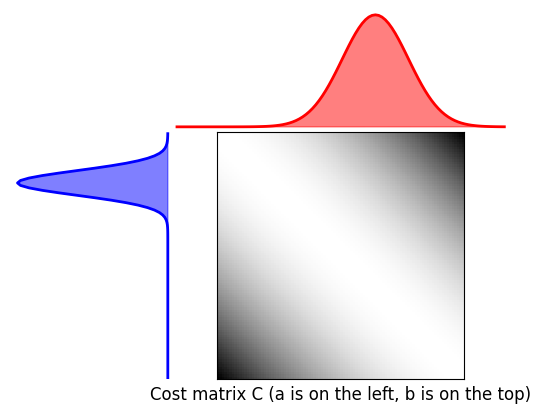

In [11]:
n = 100

a = gauss(n, m=20, s=5)  # m=mean, s=std
b = gauss(n, m=60, s=10)  
  
x = np.arange(n, dtype=np.float64)
C = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
C = C / C.max()

ot.plot.plot1D_mat(a, b, C, 'Cost matrix C (a is on the left, b is on the top)')

(<Axes: >, <Axes: >, <Axes: >)

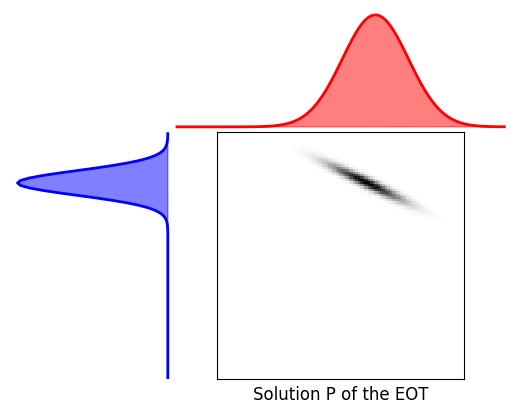

In [17]:
sinkhorn = Sinkhorn(epsilon=0.001)
sinkhorn.fit(a, b, C)

ot.plot.plot1D_mat(a, b, sinkhorn.P, 'Solution P of the EOT')